In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from stravalib import unithelper
import seaborn as sea

In [13]:
df = pd.read_csv("data/activities.csv")


## Clean up data

In [14]:
# sorts values by date (descending order) then drops duplicates
df.sort_values(by="start_date_local", ascending=False, inplace=True)
df.drop_duplicates(subset=["start_date_local"], inplace=True)


In [15]:
# Resets index then drops classic Unnamed: 0 row
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
# start to convert units

In [17]:
df["distance"] = df["distance"].apply(lambda x: round(x * 0.00062137, 2))

In [18]:
df["average_temp"] = df["average_temp"].apply(lambda x: round((9/5 * x) + 32, 0))

split dfs into run and non running dfs

In [39]:
df_nonrun = df.loc[df["type"] != "Run"]

In [36]:
df_run = df.loc[df["type"] == "Run"]

In [67]:
df.head()

,achievement_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,best_efforts,calories,device_name,distance,...,max_speed,max_watts,moving_time,name,pr_count,sport_type,start_date_local,suffer_score,type,weighted_average_watts
0,NaN,73.9,149.9,2.126,81.0,323.3,6.0,504.0,Garmin Forerunner 265,3.20,...,3.338,506.0,2421,Lunch Run,NaN,Run,2023-06-19 11:05:57,59.0,Run,334.0
1,4.0,74.1,158.6,2.266,88.0,338.1,6.0,577.0,Garmin Forerunner 265,3.65,...,4.320,636.0,2590,Morning Run,1.0,Run,2023-06-17 10:57:39,84.0,Run,365.0
2,0.0,73.1,143.4,2.056,79.0,314.0,6.0,553.0,Garmin Forerunner 265,3.56,...,2.788,477.0,2785,Lunch Run,0.0,Run,2023-06-16 11:35:23,49.0,Run,327.0
3,0.0,70.7,142.5,1.952,90.0,285.2,5.0,417.0,Garmin Forerunner 265,2.74,...,2.990,442.0,2255,Lunch Run,0.0,Run,2023-06-15 11:17:08,41.0,Run,302.0
4,0.0,71.2,139.4,1.973,88.0,294.6,5.0,440.0,Garmin Forerunner 265,2.86,...,2.822,460.0,2336,Morning Run,0.0,Run,2023-06-14 10:24:37,35.0,Run,307.0


## Graphs

<Axes: xlabel='gear', ylabel='index'>

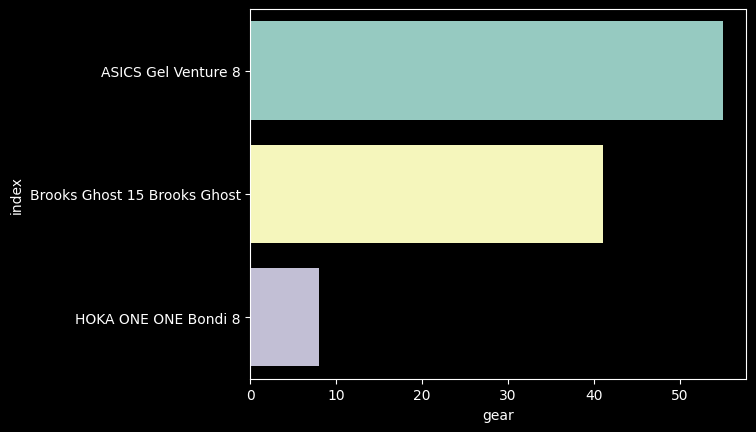

In [50]:
shoe_counts = df["gear"].value_counts().reset_index()
sea.barplot(data=shoe_counts, x="gear", y="index")

<Axes: xlabel='distance'>

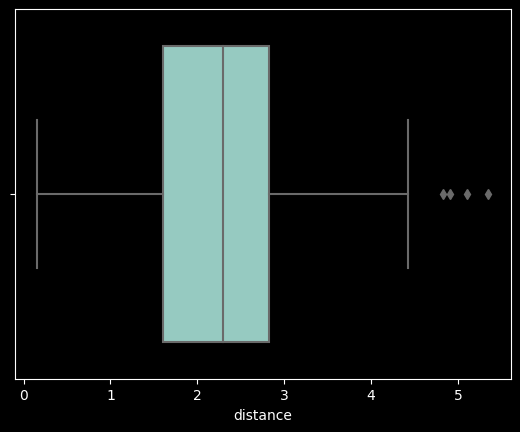

In [35]:
sea.boxplot(data=df_run, x="distance")

<Axes: xlabel='suffer_score', ylabel='Count'>

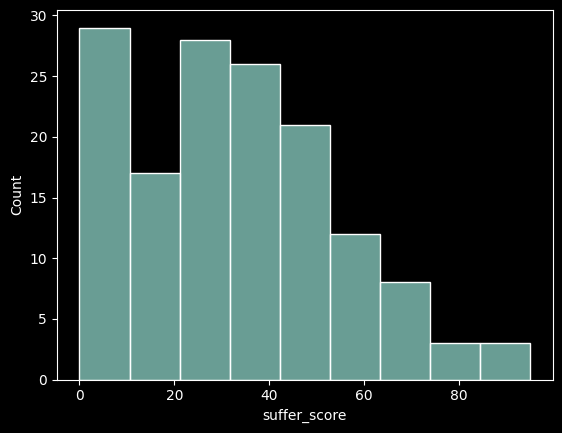

In [52]:
sea.histplot(data=df, x='suffer_score')

Text(0, 0.5, 'Suffer Score')

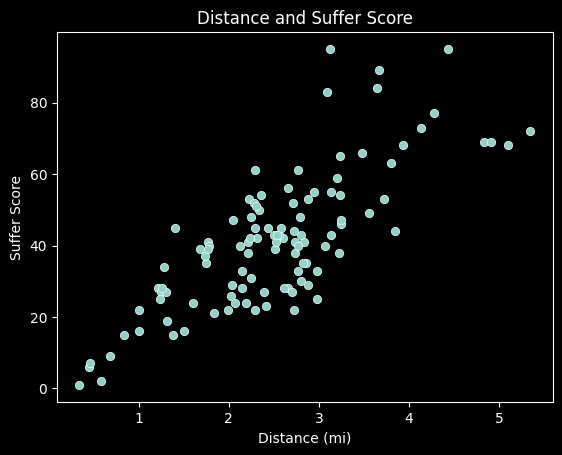

In [66]:
fig, ax = plt.subplots(1)
sea.scatterplot(data=df_run, x="distance", y="suffer_score", )
ax.set_title("Distance and Suffer Score")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Suffer Score")